In [74]:
import tensorflow as tf
import numpy as np
np.set_printoptions(precision=3)
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]
t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)
print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [75]:
t_ones = tf.ones((2, 3))
t_ones.numpy

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>>

In [76]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)
const_tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.2  , 5.   , 3.142], dtype=float32)>

In [77]:
t_a_new = tf.cast(t_a, tf.int64)#смена типа данных
t_a_new

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3], dtype=int64)>

In [78]:
t = tf.random.uniform(shape=(3, 5))
t_tr = tf.transpose(t)
print(t.shape, '---->', t_tr.shape)

(3, 5) ----> (5, 3)


In [79]:
t = tf.zeros((30,))
t_reshape = tf.reshape(t, shape=(5, 6))
t_reshape.shape

TensorShape([5, 6])

In [80]:
t = tf.zeros((1, 2, 1, 4, 1))
t_sqz = tf.squeeze(t, axis=(2, 4))
t_sqz

<tf.Tensor: shape=(1, 2, 4), dtype=float32, numpy=
array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)>

In [81]:
tf.random.set_seed(1)
t1 = tf.random.uniform(shape=(5, 2),
                       minval=-1.0, maxval=1.0)
t2 = tf.random.normal(shape=(5, 2),
                      mean=0.0, stddev=1.0)

In [82]:
t3 = tf.multiply(t1, t2).numpy()#поэлементное умножение
t3

array([[-0.27 , -0.874],
       [-0.017, -0.175],
       [-0.296, -0.139],
       [-0.727,  0.135],
       [-0.401,  0.004]], dtype=float32)

In [83]:
t4 = tf.math.reduce_mean(t1, axis=0)#среднее по столюцам
t4

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.09 , 0.207], dtype=float32)>

In [84]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)#матричное умножение
t5

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-1.144,  1.115, -0.87 , -0.321,  0.856],
       [ 0.248, -0.191,  0.25 , -0.064, -0.331],
       [-0.478,  0.407, -0.436,  0.022,  0.527],
       [ 0.525, -0.234,  0.741, -0.593, -1.194],
       [-0.099,  0.26 ,  0.125, -0.462, -0.396]], dtype=float32)>

In [85]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)
t6

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.711,  0.302],
       [ 0.371, -1.049]], dtype=float32)>

In [86]:
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()#расчет L2 нормы тензора
norm_t1

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

In [87]:
#аналогично
np.sqrt(np.sum(np.square(t1), axis=1))

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

In [88]:
tf.random.set_seed(1)
t = tf.random.uniform((6,))
t.numpy()

array([0.165, 0.901, 0.631, 0.435, 0.292, 0.643], dtype=float32)

In [89]:
t_splits = tf.split(t, num_or_size_splits=3)
t_splits

[<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.165, 0.901], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.631, 0.435], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.292, 0.643], dtype=float32)>]

In [90]:
t = tf.random.uniform((5,))
t.numpy()

array([0.51 , 0.444, 0.409, 0.992, 0.689], dtype=float32)

In [91]:
t_splits = tf.split(t, num_or_size_splits=[3,2])
t_splits

[<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.51 , 0.444, 0.409], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.992, 0.689], dtype=float32)>]

In [92]:
A = tf.ones((3,))
B = tf.zeros((2,))
C = tf.concat([A, B], axis=0)#объединение
C


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 1., 0., 0.], dtype=float32)>

In [93]:
A = tf.ones((3,))
B = tf.zeros((3,))
S = tf.stack([A, B], axis=1)#укладывание стопкой
S

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)>

In [94]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]
ds = tf.data.Dataset.from_tensor_slices(a)
ds

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>

In [95]:
for item in ds:
    print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [96]:
ds_batch = ds.batch(3)
for i, elem in enumerate(ds_batch, 1):
    print(f'Пакет {i}: {elem}')

Пакет 1: [1.2 3.4 7.5]
Пакет 2: [4.1 5.  1. ]


In [97]:
t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

In [98]:
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)
ds_joint = tf.data.Dataset.zip((ds_x, ds_y))

In [99]:
for example in ds_joint:
    print('x:', example[0].numpy(), 'y:', example[1].numpy())

x: [0.829 0.634 0.515] y: 0
x: [0.391 0.581 0.048] y: 1
x: [0.178 0.705 0.492] y: 2
x: [0.346 0.508 0.222] y: 3


In [100]:
#аналогично
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))
for example in ds_joint:
    print('x:', example[0].numpy(), 'y:', example[1].numpy())

x: [0.829 0.634 0.515] y: 0
x: [0.391 0.581 0.048] y: 1
x: [0.178 0.705 0.492] y: 2
x: [0.346 0.508 0.222] y: 3


In [101]:
ds_trans = ds_joint.map(lambda x, y: (x*2-1.0, y))
for example in ds_trans:
    print('x:', example[0].numpy(), 'y:', example[1].numpy())

x: [0.659 0.268 0.029] y: 0
x: [-0.218  0.162 -0.903] y: 1
x: [-0.645  0.409 -0.016] y: 2
x: [-0.308  0.016 -0.557] y: 3


In [102]:
ds = ds_joint.shuffle(buffer_size=len(t_x))#тасование без потери соответствий
#buffer_size - количество элементов в группе перед тасованием
for example in ds:
    print('x:', example[0].numpy(), 'y:', example[1].numpy())


x: [0.829 0.634 0.515] y: 0
x: [0.391 0.581 0.048] y: 1
x: [0.346 0.508 0.222] y: 3
x: [0.178 0.705 0.492] y: 2


In [103]:
ds = ds_joint.batch(batch_size=3,
                    drop_remainder=False)#разбиение данных на поднаборы
batch_x, batch_y = next(iter(ds))
print('Пакет х: \n', batch_x.numpy())
print('Пакет y: \n', batch_y.numpy())

Пакет х: 
 [[0.829 0.634 0.515]
 [0.391 0.581 0.048]
 [0.178 0.705 0.492]]
Пакет y: 
 [0 1 2]


In [104]:
ds = ds_joint.batch(3).repeat(count=2)#аналог эпох
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.numpy(), batch_y.numpy())

0 [[0.829 0.634 0.515]
 [0.391 0.581 0.048]
 [0.178 0.705 0.492]] [0 1 2]
1 [[0.346 0.508 0.222]] [3]
2 [[0.829 0.634 0.515]
 [0.391 0.581 0.048]
 [0.178 0.705 0.492]] [0 1 2]
3 [[0.346 0.508 0.222]] [3]


In [105]:
ds = ds_joint.repeat(count=2).batch(3)#в итоге 3 пакета т.к. сначала размножили и потом разделили
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.numpy(), batch_y.numpy())

0 [[0.829 0.634 0.515]
 [0.391 0.581 0.048]
 [0.178 0.705 0.492]] [0 1 2]
1 [[0.346 0.508 0.222]
 [0.829 0.634 0.515]
 [0.391 0.581 0.048]] [3 0 1]
2 [[0.178 0.705 0.492]
 [0.346 0.508 0.222]] [2 3]


In [106]:
#Порядок 1 тасование -> создание пакетов -> повторение
tf.random.set_seed(1)
ds = ds_joint.shuffle(4).batch(2).repeat(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.numpy(), batch_y.numpy()) 

0 [[0.178 0.705 0.492]
 [0.391 0.581 0.048]] [2 1]
1 [[0.829 0.634 0.515]
 [0.346 0.508 0.222]] [0 3]
2 [[0.829 0.634 0.515]
 [0.346 0.508 0.222]] [0 3]
3 [[0.391 0.581 0.048]
 [0.178 0.705 0.492]] [1 2]
4 [[0.346 0.508 0.222]
 [0.829 0.634 0.515]] [3 0]
5 [[0.391 0.581 0.048]
 [0.178 0.705 0.492]] [1 2]


In [107]:
#порядок 2: создание пакетов -> тасование -> повторение
ds = ds_joint.batch(2).shuffle(4).repeat(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.numpy(), batch_y.numpy())

0 [[0.178 0.705 0.492]
 [0.346 0.508 0.222]] [2 3]
1 [[0.829 0.634 0.515]
 [0.391 0.581 0.048]] [0 1]
2 [[0.178 0.705 0.492]
 [0.346 0.508 0.222]] [2 3]
3 [[0.829 0.634 0.515]
 [0.391 0.581 0.048]] [0 1]
4 [[0.829 0.634 0.515]
 [0.391 0.581 0.048]] [0 1]
5 [[0.178 0.705 0.492]
 [0.346 0.508 0.222]] [2 3]


In [108]:
import tensorflow_datasets as tfds
print(len(tfds.list_builders()))
print(tfds.list_builders()[:5])

413
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


In [109]:
celeba_bldr = tfds.builder('celeb_a')
print(celeba_bldr.info.features)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': bool,
        'Arched_Eyebrows': bool,
        'Attractive': bool,
        'Bags_Under_Eyes': bool,
        'Bald': bool,
        'Bangs': bool,
        'Big_Lips': bool,
        'Big_Nose': bool,
        'Black_Hair': bool,
        'Blond_Hair': bool,
        'Blurry': bool,
        'Brown_Hair': bool,
        'Bushy_Eyebrows': bool,
        'Chubby': bool,
        'Double_Chin': bool,
        'Eyeglasses': bool,
        'Goatee': bool,
        'Gray_Hair': bool,
        'Heavy_Makeup': bool,
        'High_Cheekbones': bool,
        'Male': bool,
        'Mouth_Slightly_Open': bool,
        'Mustache': bool,
        'Narrow_Eyes': bool,
        'No_Beard': bool,
        'Oval_Face': bool,
        'Pale_Skin': bool,
        'Pointy_Nose': bool,
        'Receding_Hairline': bool,
        'Rosy_Cheeks': bool,
        'Sideburns': bool,
        'Smiling': bool,
        'Straight_Hair': bool,
        'Wavy_Hair': b

In [110]:
celeba_bldr.info.features['image']

Image(shape=(218, 178, 3), dtype=uint8)

In [111]:
celeba_bldr.info.features['attributes'].keys()

dict_keys(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young'])

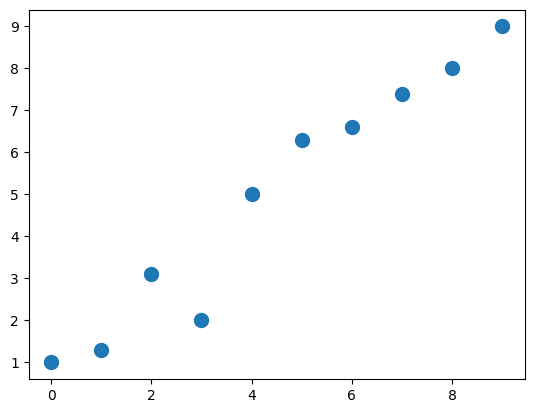

In [112]:
import matplotlib.pyplot as plt
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])
plt.plot(X_train, y_train, 'o', markersize=10)

In [113]:
X_train_norm =(X_train - np.mean(X_train)) / np.std(X_train)
ds_train_orig = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train_norm, tf.float32),
    tf.cast(y_train, tf.float32)))

In [114]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def call(self, x):
        return self.w * x + self.b


In [115]:
model = MyModel()
model.build(input_shape=(None, 1))#сколько угодно образцов на вход, но только с 1 признаком
model.summary()#послойная сводка по компонентам

Model: "my_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [116]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [117]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)


In [118]:
tf.random.set_seed(1)
num_epoch = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))
ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)
Ws, bs = [], []
for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epoch:
        break
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())

    bx, by = batch
    loss_val = loss_fn(model(bx), by)
    train(model, bx, by, learning_rate=learning_rate)
    if i % log_steps==0:
        print(f'Эпоха {int(i / steps_per_epoch)} Шаг {i} Потеря {loss_val}')

Эпоха 0 Шаг 0 Потеря 43.55999755859375
Эпоха 10 Шаг 100 Потеря 0.7530134320259094


Эпоха 20 Шаг 200 Потеря 20.175859451293945
Эпоха 30 Шаг 300 Потеря 23.397605895996094
Эпоха 40 Шаг 400 Потеря 6.348119258880615
Эпоха 50 Шаг 500 Потеря 4.635603427886963
Эпоха 60 Шаг 600 Потеря 0.24105073511600494
Эпоха 70 Шаг 700 Потеря 0.20362770557403564
Эпоха 80 Шаг 800 Потеря 3.8176910877227783
Эпоха 90 Шаг 900 Потеря 0.9416388869285583
Эпоха 100 Шаг 1000 Потеря 0.7034985423088074
Эпоха 110 Шаг 1100 Потеря 0.034772761166095734
Эпоха 120 Шаг 1200 Потеря 0.5403661131858826
Эпоха 130 Шаг 1300 Потеря 0.11702598631381989
Эпоха 140 Шаг 1400 Потеря 0.11948295682668686
Эпоха 150 Шаг 1500 Потеря 0.09437620639801025
Эпоха 160 Шаг 1600 Потеря 0.4670370817184448
Эпоха 170 Шаг 1700 Потеря 2.0694775581359863
Эпоха 180 Шаг 1800 Потеря 0.001972649712115526
Эпоха 190 Шаг 1900 Потеря 0.3612426519393921


In [119]:
print('Финальные параметры', model.w.numpy(), model.b.numpy())

Финальные параметры 2.6576622 4.8798566


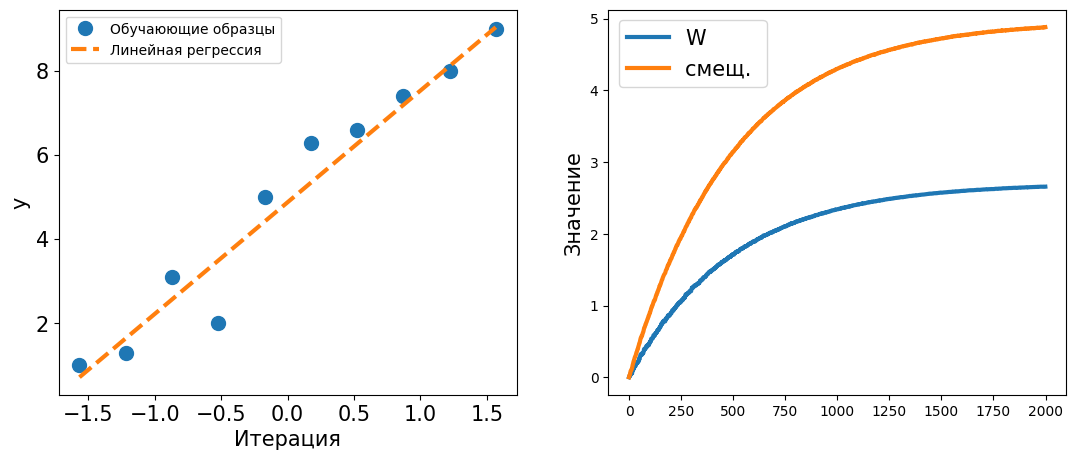

In [120]:
X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Обучаюющие образцы', 'Линейная регрессия'])
ax.set_xlabel('x', size=15)
ax.set_ylabel ('у', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ах= fig.add_subplot(1, 2, 2)
plt .plot (Ws, lw=3)
plt.plot (bs, lw=3)
plt. legend ( [ 'W', 'смещ. '] , fontsize=15)
ax.set_xlabel ('Итерация', size=15)
ах.set_ylabel('Значение', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

In [121]:
tf.random.set_seed(1)
model = MyModel()
model.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['mae', 'mse'])

In [122]:
model.fit(X_train_norm, y_train, epochs=num_epoch, batch_size=batch_size, verbose=1)

Epoch 1/200
10/10 [==============================] - 0s 2ms/step - loss: 27.8723 - mae: 4.5654 - mse: 27.8723
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 18.6586 - mae: 3.7446 - mse: 18.6586
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 12.5239 - mae: 3.0454 - mse: 12.5239
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 8.4670 - mae: 2.4907 - mse: 8.4670
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 5.7632 - mae: 2.0567 - mse: 5.7632
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 3.9697 - mae: 1.7232 - mse: 3.9697
Epoch 7/200
10/10 [==============================] - 0s 0s/step - loss: 2.7766 - mae: 1.4752 - mse: 2.7766
Epoch 8/200
10/10 [==============================] - 0s 0s/step - loss: 1.9861 - mae: 1.2578 - mse: 1.9861
Epoch 9/200
10/10 [==============================] - 0s 0s/step - loss: 1.4572 - mae: 1.0978 - mse: 1.4572
Epoch 10/200
10/10 [=====

In [123]:
iris, iris_info = tfds.load('iris', with_info=True)
iris_info

tfds.core.DatasetInfo(
    name='iris',
    full_name='iris/2.1.0',
    description="""
    This is perhaps the best known database to be found in the pattern recognition
    literature. Fisher's paper is a classic in the field and is referenced
    frequently to this day. (See Duda & Hart, for example.) The data set contains
    3 classes of 50 instances each, where each class refers to a type of iris
    plant. One class is linearly separable from the other 2; the latter are NOT
    linearly separable from each other.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    data_dir='C:\\Users\\VIKTOR\\tensorflow_datasets\\iris\\2.1.0',
    file_format=tfrecord,
    download_size=3.65 KiB,
    dataset_size=7.62 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=float32),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('features', 'label'),
    disable_shuffling=False,
    splits={
        'tra

In [124]:
tf.random.set_seed(1)
ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)#избегаем смешивания данных для испытания и обучения
ds_train_orig = ds_orig.take(100)
ds_test_orig = ds_orig.skip(100)

In [125]:
ds_train_orig = ds_train_orig.map(
    lambda x: (x['features'], x['label'])
)
ds_test = ds_test_orig.map(
    lambda x: (x['features'], x['label'])
)
ds_train_orig

<_MapDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [126]:
iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid',#Первый получает на вход 4 признака и проецирует на 16 нейронов
                          name='fc1', input_shape=(4,)),
    tf.keras.layers.Dense(3, name='fc2',#получает на вход выход предыдущего слоя и проецирует его на 3 выходных нейрона
                          activation='softmax')])
#softmax для многоклассовой классификации
iris_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [127]:
iris_model.compile(optimizer='adam', #оптимизатор
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [128]:
num_epochs = 100 #количество эпох
trainnig_size=100 #размер тренировочной выборки
batch_size=2#размер пакета, которым будем обучать
steps_per_epoch=np.ceil(trainnig_size / batch_size)
ds_train = ds_train_orig.shuffle(buffer_size=trainnig_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)#добавляет буфер предварительной подгрузки для улучшения производительности
history = iris_model.fit(ds_train, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch,
                         verbose = 0)
#history хранит в себе потерю и правильность при оубчении

Text(0.5, 1.0, 'Правильность при обучении')

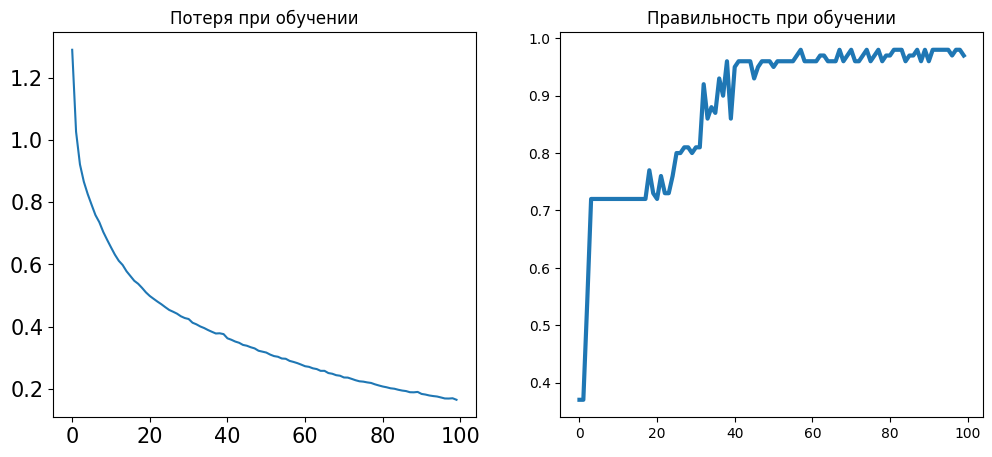

In [129]:
hist = history.history
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'])
ax.set_title('Потеря при обучении')
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Правильность при обучении')

In [130]:
results = iris_model.evaluate(ds_test.batch(50), verbose=0)#при вызове evualate необходимо 1 доп измерение
print(f"Потеря при испытании {results[0]} Правильность при испытании {results[1]}")

Потеря при испытании 0.16494101285934448 Правильность при испытании 0.9800000190734863


In [131]:
iris_model.save('iris-classifier.h5',
                overwrite=True,
                include_optimizer=True,
                save_format='h5')

In [132]:
iris_model_new = tf.keras.models.load_model('iris-classifier.h5')

In [133]:
iris_model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [134]:
results = iris_model_new.evaluate(ds_test.batch(50), verbose=0)
print(f"Потеря при испытании {results[0]} Правильность при испытании {results[1]}")

Потеря при испытании 0.16494101285934448 Правильность при испытании 0.9800000190734863


Использование сигмоидальной функции активации проблематично при наличии больших отрицательных входных значений -> долгое обучение
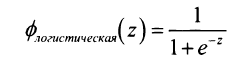


Решение - гиперболический тангенс

In [135]:
X = np.array([1, 1.4, 2.5])#двумерная переменная (1 коэф - смещение)
w = np.array([0.4, 0.3, 0.5])#веса для признаков
def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return(logistic(z))

print(f'P(y=1|x) = {logistic_activation(X, w)}')

P(y=1|x) = 0.8879529614430097


In [136]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])
А = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot (W, А[0])
y_probas = logistic(Z)
print('Общий вход: \n', Z)
print('Выходные элементы: \n', y_probas)

Общий вход: 
 [1.78 0.76 1.65]
Выходные элементы: 
 [0.856 0.681 0.839]


Нет содержательных и интерпретируемых значений вер-ти, не проблема если нужно только предсказать метку класса (argmax)

Исправление - использование многопеременной логистической регрессии 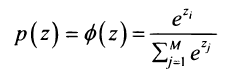 (softmax)

In [139]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
y_probas


array([0.447, 0.161, 0.392])

In [142]:
Z_tensor = tf.expand_dims(Z, axis=0)
tf.keras.activations.softmax(Z_tensor)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.447, 0.161, 0.392]])>

Аналагом логистической функции выступает гиперболический тангенс, его преимущество в том, что он выдает результаты в диапозоне (-1; 1), что может улушить сходимость 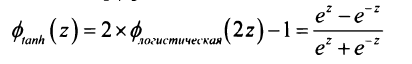

(-1.5, 1.5)

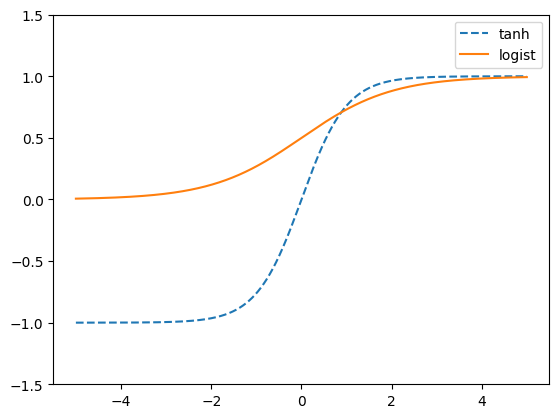

In [145]:
def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)
z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.plot(z, tanh_act, linestyle='--', label = 'tanh')
plt.plot(z, log_act, label = 'logist')
plt.legend(loc = 'best')
plt.ylim([-1.5, 1.5])

In [148]:
np.set_printoptions(precision=7)
np.tanh(z)

array([-0.9999092, -0.9999083, -0.9999074, ...,  0.9999064,  0.9999074,
        0.9999083])

In [149]:
tf.keras.activations.tanh(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([-0.9999092, -0.9999083, -0.9999074, ...,  0.9999064,  0.9999074,
        0.9999083])>

In [150]:
from scipy.special import expit
expit(z)

array([0.0066929, 0.0067262, 0.0067597, ..., 0.9932067, 0.9932403,
       0.9932738])

In [151]:
logistic(z)

array([0.0066929, 0.0067262, 0.0067597, ..., 0.9932067, 0.9932403,
       0.9932738])

In [152]:
tf.keras.activations.sigmoid(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([0.0066929, 0.0067262, 0.0067597, ..., 0.9932067, 0.9932403,
       0.9932738])>

При использовании гиперболического тангенса возникают проблемы с потерей градиента (z1 = 20 изменяется на z2 = 25 ф(z1) = 1 ф(z2) = 1). Эту проблему может решить активация ReLU - выпрямленный линейный элемент 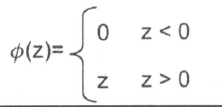

In [153]:
tf.keras.activations.relu(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=array([0.   , 0.   , 0.   , ..., 4.985, 4.99 , 4.995])>

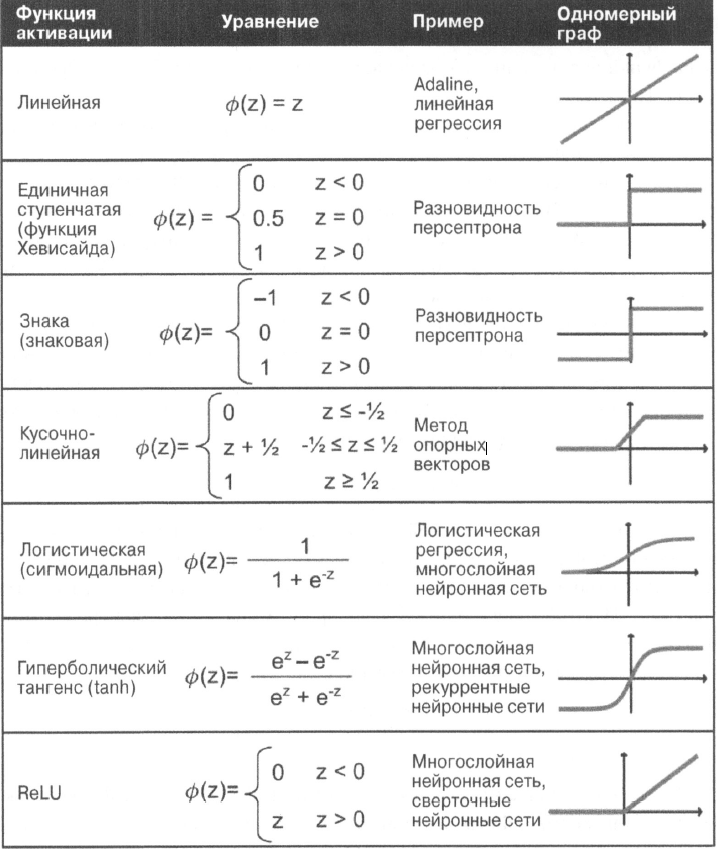